In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("IMDB Dataset.csv")
df.head()


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
# Step 3: Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()


review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

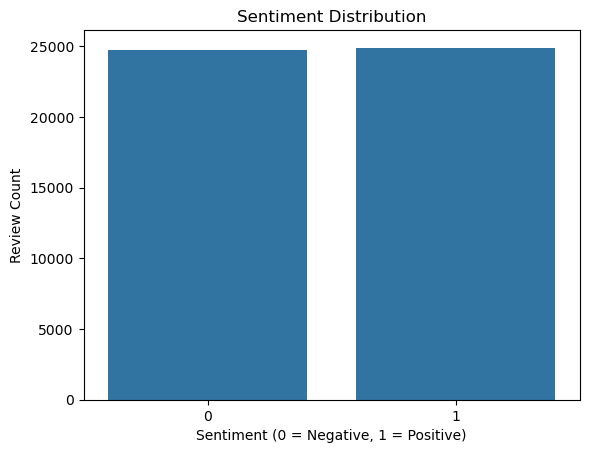

In [4]:
# Step 4: Visualize Sentiment Distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Review Count")
plt.show()

In [5]:
# Step 5: Train/Test Split
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8855500655440153
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [8]:
# Step 8: Predict Sentiments on Full Dataset
df['predicted_sentiment'] = model.predict(tfidf.transform(df['review']))

In [11]:
def recommend_positive_review(index, top_n=5, sample_size=1000):
    # Filter positive reviews
    positive_df = df[df['predicted_sentiment'] == 1].sample(n=sample_size, random_state=42).reset_index(drop=True)

    tfidf_matrix = tfidf.fit_transform(positive_df['review'])

    cosine_sim = cosine_similarity(tfidf_matrix)

    if index >= len(positive_df):
        return f"Index must be between 0 and {len(positive_df) - 1}"

    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    review_indices = [i[0] for i in sim_scores]
    return positive_df.iloc[review_indices][['review', 'predicted_sentiment']]


In [12]:
# Step 10: Example - Get Similar Reviews to a Positive One
recommend_positive_review(20)

review  predicted_sentiment
271  Quote: theurgist: Anyone with an I.Q. over 50 ...                    1
996  Adam Sandler's movies are my favorite comedies...                    1
486  This movie was quite a pleasant surprise. I ha...                    1
265  <br /><br />Human Body --- WoW.<br /><br />The...                    1
70   Before I took a job as a reviewer, I never wen...                    1